# Introduction: A Long-only Strategy based on Price & Volume Data

## Getting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("bitcoin.csv", parse_dates = ["Date"], index_col = "Date")
data

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 2017-08-17 04:00:00.000 to 2021-10-07 09:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    36168 non-null  float64
 1   High    36168 non-null  float64
 2   Low     36168 non-null  float64
 3   Close   36168 non-null  float64
 4   Volume  36168 non-null  float64
dtypes: float64(5)
memory usage: 1.7+ MB


In [4]:
data = data[["Close", "Volume"]].copy()

In [5]:
data

,Close,Volume
Date,,
2017-08-17 04:00:00.000,4308.83,47.181009
2017-08-17 05:00:00.000,4315.32,23.234916
2017-08-17 06:00:00.000,4324.35,7.229691
2017-08-17 07:00:00.000,4349.99,4.443249
2017-08-17 08:00:00.000,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


## Financial Data Analysis / Visual Inspection

In [6]:
data

,Close,Volume
Date,,
2017-08-17 04:00:00.000,4308.83,47.181009
2017-08-17 05:00:00.000,4315.32,23.234916
2017-08-17 06:00:00.000,4324.35,7.229691
2017-08-17 07:00:00.000,4349.99,4.443249
2017-08-17 08:00:00.000,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


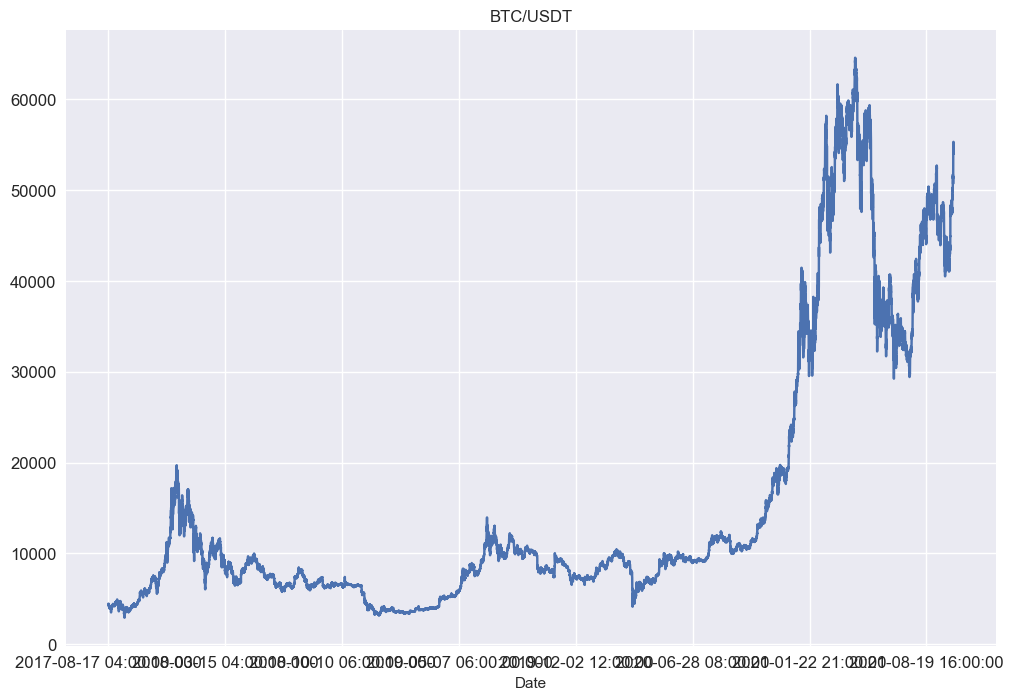

In [7]:
data.Close.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

In [9]:
data.Close.loc["2019-06"].plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

KeyError: '2019-06'

In [ ]:
data.Volume.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

In [ ]:
data.Volume.loc["2019-06-05"].plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

In [ ]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [ ]:
data.describe()

In [ ]:
data.returns.plot(kind = "hist", bins = 100, figsize = (12,8))
plt.show()

In [ ]:
data.returns.nlargest(10)

In [ ]:
data.returns.nsmallest(10)

## A simple Buy and Hold "Strategy"

Assumption: Invest 1 USD(T) in BTC on 2017-08-17 and hold until 2021-10-07 (no further trades).

In [ ]:
data

In [ ]:
data.Close / data.Close[0]

In [ ]:
data.returns.sum()

In [ ]:
multiple = np.exp(data.returns.sum())
multiple

In [ ]:
data["creturns"] = data.returns.cumsum().apply(np.exp) # Normalized Prices with Base Value 1

In [ ]:
data

In [ ]:
data.creturns.plot(figsize = (12, 8), title = "BTC/USDT - Buy and Hold", fontsize = 12)
plt.show()

## Performance Measurement

In [ ]:
data

__mean return and risk__

In [ ]:
mu = data.returns.mean()
mu

In [ ]:
std = data.returns.std()
std

__annualized mean return and risk__

In [ ]:
number_of_periods = 24 * 365.25
number_of_periods

In [ ]:
ann_mean = mu * number_of_periods
ann_mean

In [ ]:
ann_std = std * np.sqrt(number_of_periods)
ann_std

__CAGR__

In [ ]:
cagr = np.exp(ann_mean) - 1
cagr

__Risk-adjusted Return__ ("Sharpe Ratio")

In [ ]:
ann_mean / ann_std

In [ ]:
cagr / ann_std

## Preparing the Data for the Trading Strategy

In [ ]:
data

__Adding the Feature "Change in Trading Volume (log)"__

In [ ]:
data["vol_ch"] = np.log(data.Volume.div(data.Volume.shift(1)))
data

__Data Cleaning (removing outliers)__

In [ ]:
data.vol_ch.nsmallest(20)

In [ ]:
data.vol_ch.nlargest(20)

In [ ]:
data.loc[data.vol_ch > 3, "vol_ch"] = np.nan
data.loc[data.vol_ch < -3, "vol_ch"] = np.nan

In [ ]:
data.info()

In [ ]:
data.vol_ch.plot(kind = "hist", bins = 100, figsize = (12,8))
plt.show()

In [ ]:
data

## Explanatory Data Analysis: Financial Returns and Trading Volume (1)

__Question 1: Is there a relationship between price changes and volume changes?__ <br>
(e.g. rapid Increase in Trading Volume triggers extreme Price changes) 

In [ ]:
data

In [ ]:
plt.scatter(x = data.vol_ch, y = data.returns)
plt.xlabel("Volume_Change")
plt.ylabel("Returns")
plt.show()

Discretize columns returns and vol_ch: Sort and reorganize each in 10 equal sized buckets

In [ ]:
pd.qcut(data.returns, q = 10)

In [ ]:
data["ret_cat"] = pd.qcut(data.returns, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])

In [ ]:
data

In [ ]:
data.ret_cat.value_counts()

In [ ]:
data["vol_cat"] = pd.qcut(data.vol_ch, q = 10, labels = [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])

In [ ]:
data

In [ ]:
matrix = pd.crosstab(data.vol_cat, data.ret_cat)
matrix

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap = "RdYlBu_r", annot = True, robust = True, fmt = ".0f")
plt.show()

__-> Extreme increases in Trading Volume trigger extreme (positive and negative) returns.__ <br>
__-> Low to moderate changes in the Trading Volume occur frequently with low to moderate returns__.

## Explanatory Data Analysis: Financial Returns and Trading Volume (2)

Question 2: Can we use return/vol_ch clusters to (partly) forecast future returns? <br>
(e.g. Cluster 5/5 is a strong momentum signal -> prices will further rise in the near future) 

In [ ]:
data

In [ ]:
data.vol_cat.shift()

In [ ]:
matrix = pd.crosstab(data.vol_cat.shift(), data.ret_cat.shift(),
                     values = data.returns, aggfunc = np.mean)
matrix

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap = "RdYlBu", annot = True, robust = True, fmt = ".5f")
plt.show()

__-> Extremely High (positive) returns and Decreases in Volume is a Contrarian (mean-reverting) signal -> prices will fall.__ <br>
__-> Extremely Low (negative) returns and Decreases in Volume is a Contrarian (mean-reverting) signal -> prices will rise.__

## Formulating a Long-only Price/Volume Trading Strategy

__Plan__: Make Use of the _"Extremely High (positive) returns and Decreases in Volume"_ Cluster (falling prices):

__Implementation__: 
- Buy BTC/USDT in the Spot market and hold...
- ...until there is a signal to sell -> sell and go neutral.
- Buy back when the signal to sell has disappeared.

In [ ]:
data

In [ ]:
data["position"] = 1 # Trading position -> long(1) for all bars: Buy-and-Hold
data

Sell and go Neutral (position = 0) if returns are very high (cond1) and vol_ch is negative (cond2)

In [ ]:
# getting returns threshold for very high returns (>= 90th percentile)
return_thresh = np.percentile(data.returns.dropna(), 90)
return_thresh

In [ ]:
cond1 = data.returns >= return_thresh
cond1

In [ ]:
# getting vol_ch thresholds for (moderate) Volume Decreases (between 5th and 20th percentile)
volume_thresh = np.percentile(data.vol_ch.dropna(), [5, 20])
volume_thresh

In [ ]:
cond2 = data.vol_ch.between(volume_thresh[0], volume_thresh[1])
cond2

In [ ]:
data.loc[cond1 & cond2, "position"] = 0

In [ ]:
data

In [ ]:
data.position.value_counts()

In [ ]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.loc["2019-06", "position"].plot(figsize = (12 , 8))
plt.show()

## Strategy Backtest

In [ ]:
data

In [ ]:
# position to take for the next bar - use shift(1)
data["strategy"] = data.position.shift(1) * data["returns"]
data

In [ ]:
data.loc["2017-08-19"]

In [ ]:
data[["returns", "strategy"]].sum().apply(np.exp) # multiple for buy-and-hold and strategy

In [ ]:
# normalized price with base = 1 for strategy
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp) 

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8), fontsize = 12)
plt.show()

In [ ]:
tp_year = 24 * 365.25  # 1h trading periods per year
tp_year

In [ ]:
ann_mean = data[["returns", "strategy"]].mean() * tp_year # annualized returns
ann_mean

In [ ]:
ann_std = data[["returns", "strategy"]].std() * np.sqrt(tp_year) # annualized std
ann_std

In [ ]:
sharpe = (np.exp(ann_mean) - 1) / ann_std
sharpe

Great, but we still ignore:
- __Trading Costs__
- __Parameter Optimization__
- __Forward Testing__ (to avoid/remove data snooping and the lookahead bias)

## Trading Costs

In [ ]:
data

In [ ]:
data.position.value_counts()

In [ ]:
data.position.diff().fillna(0).abs() # absolute change in position

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

In [ ]:
data

-> __718 single trades__ (from neutral to long or from long to neutral) <br>
-> each trade __triggers trading costs__, don´t ignore them!!! <br>
-> Trading Costs __must be included__ in Backtesting!!! <br>

In [ ]:
commissions = 0.00075 # reduced Binance commission 0.075%
commissions

In [ ]:
other = 0.0001 # proportional costs for bid-ask spread & slippage (more detailed analysis required!)
other

In [ ]:
# total proportional trading costs (negative log return)
ptc = np.log(1 - commissions) + np.log(1 - other)
ptc

In [ ]:
data

In [ ]:
data["strategy_net"] = data.strategy + data.trades * ptc # strategy returns net of costs

In [ ]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data[["creturns", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()